In [3]:
import pandas as pd

In [4]:
movie = pd.read_csv('ml-25m/movies.csv')
ratings = pd.read_csv('ml-25m/ratings.csv')

In [5]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [7]:
ratings = ratings.drop('timestamp', axis=1)

In [8]:
ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [9]:
import pandas as pd

ratings_df = pd.read_csv('ml-25m/ratings.csv')
movies_df = pd.read_csv('ml-25m/movies.csv')

movies_ratings_df = pd.merge(ratings_df, movies_df, on="movieId")

small_movies_ratings_df = movies_ratings_df[:10000]

ratings_df = small_movies_ratings_df.reset_index(drop=True)

user_ratings_pivot = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

avg_ratings = user_ratings_pivot.mean(axis=1)
filled_user_item_matrix = user_ratings_pivot.sub(avg_ratings, axis=0).fillna(0)


In [10]:
filled_user_item_matrix.head()

movieId,1,2,3,5,6,7,9,10,11,14,...,182715,182823,187541,187593,189333,195159,200818,200838,203375,203519
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,...,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229,-0.081229
2,3.296775,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,...,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225,-0.203225
3,3.262093,-0.737907,-0.737907,-0.737907,-0.737907,-0.737907,-0.737907,-0.737907,-0.737907,-0.737907,...,-0.737907,2.262093,2.762093,3.762093,-0.737907,-0.737907,-0.737907,-0.737907,-0.737907,-0.737907
4,2.751293,-0.248707,-0.248707,-0.248707,-0.248707,-0.248707,-0.248707,-0.248707,-0.248707,-0.248707,...,4.251293,-0.248707,3.251293,3.251293,3.751293,4.751293,4.751293,2.751293,4.251293,2.251293
5,3.884697,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,...,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303,-0.115303


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(filled_user_item_matrix)

cosine_similarity_df = pd.DataFrame(similarities,
                                    index=filled_user_item_matrix.index,
                                    columns=filled_user_item_matrix.index)
cosine_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.010201,-0.001074,0.004636,-0.008629,-0.012413,0.082918,-0.008348,-0.009415,0.009031,...,0.006200,-0.012525,0.109552,0.050013,0.066039,-0.014767,-0.021501,-0.015032,0.027486,-0.002442
2,0.010201,1.000000,0.093823,0.149475,0.125682,0.113875,0.047515,0.137379,0.083273,0.134199,...,0.131331,0.087306,0.084431,0.252501,0.290441,0.224253,0.141783,0.035913,0.080509,0.131457
3,-0.001074,0.093823,1.000000,0.281502,-0.015372,0.086019,-0.006997,-0.012480,-0.043644,0.088017,...,0.040714,-0.044089,0.110521,0.201226,0.138870,0.127157,-0.104538,-0.000035,0.001178,0.016536
4,0.004636,0.149475,0.281502,1.000000,0.023080,0.051967,-0.006703,0.037243,0.008647,0.054529,...,0.019619,0.022974,0.149917,0.138742,0.147264,0.163868,-0.026823,-0.003309,-0.001956,0.021134
5,-0.008629,0.125682,-0.015372,0.023080,1.000000,0.102048,0.191285,0.282524,0.185378,0.254675,...,0.123302,0.096240,0.018173,0.135603,0.153964,0.167625,0.189669,0.264584,0.251744,0.263324


In [12]:
import pandas as pd

user_ratings_transposed = user_ratings_pivot.T

user_corr_matrix = user_ratings_transposed.corr(method='pearson')

user_corr_matrix_df = pd.DataFrame(user_corr_matrix, columns=user_ratings_transposed.columns,
                                   index=user_ratings_transposed.columns)


user_corr_matrix_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.010201,-0.001074,0.004636,-0.008629,-0.012413,0.082918,-0.008348,-0.009415,0.009031,...,0.006200,-0.012525,0.109552,0.050013,0.066039,-0.014767,-0.021501,-0.015032,0.027486,-0.002442
2,0.010201,1.000000,0.093823,0.149475,0.125682,0.113875,0.047515,0.137379,0.083273,0.134199,...,0.131331,0.087306,0.084431,0.252501,0.290441,0.224253,0.141783,0.035913,0.080509,0.131457
3,-0.001074,0.093823,1.000000,0.281502,-0.015372,0.086019,-0.006997,-0.012480,-0.043644,0.088017,...,0.040714,-0.044089,0.110521,0.201226,0.138870,0.127157,-0.104538,-0.000035,0.001178,0.016536
4,0.004636,0.149475,0.281502,1.000000,0.023080,0.051967,-0.006703,0.037243,0.008647,0.054529,...,0.019619,0.022974,0.149917,0.138742,0.147264,0.163868,-0.026823,-0.003309,-0.001956,0.021134
5,-0.008629,0.125682,-0.015372,0.023080,1.000000,0.102048,0.191285,0.282524,0.185378,0.254675,...,0.123302,0.096240,0.018173,0.135603,0.153964,0.167625,0.189669,0.264584,0.251744,0.263324


## Calculating Pearson correlation coefficient

In [13]:
ratings_df = small_movies_ratings_df.reset_index(drop=True)

user_ratings_pivot_NA = ratings_df.pivot(index='userId', columns='movieId', values='rating')

user_ratings_pivot_NA.head()

movieId,1,2,3,5,6,7,9,10,11,14,...,182715,182823,187541,187593,189333,195159,200818,200838,203375,203519
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,3.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,3.5,3.5,4.0,5.0,5.0,3.0,4.5,2.5
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Measuring Sparsity

In [14]:
ratings_df = small_movies_ratings_df.reset_index(drop=True)

user_ratings_pivot_NA = ratings_df.pivot(index='userId', columns='movieId', values='rating')

number_of_empty = user_ratings_pivot_NA.isnull().values.sum()
total_number = user_ratings_pivot_NA.size
sparsity = number_of_empty / total_number
print(''
      'Number of Empty Rows: {0} \n'
      'Total Number of Rows:{1} \n'
      'Sparsity {2}'.format(number_of_empty, total_number, sparsity))

Number of Empty Rows: 236525 
Total Number of Rows:246525 
Sparsity 0.9594361626609877


In [15]:
from sklearn.decomposition import TruncatedSVD

# Step 2: Compute similarity matrix S = Rf.T @ Rf
similarity_matrix = filled_user_item_matrix.T.dot(filled_user_item_matrix)

# Step 3: Perform eigenvalue decomposition
d = 10
svd = TruncatedSVD(n_components=d)
svd.fit(similarity_matrix)
eigenvalues = svd.singular_values_
eigenvectors = svd.components_.T

# Step 4: Reduce dimensionality of Rf
reduced_representation = filled_user_item_matrix.dot(eigenvectors)

In [33]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

sparse_filled_user_item_matrix = csr_matrix(filled_user_item_matrix)
U, sigma, Vt = svds(sparse_filled_user_item_matrix, k=50)
print('Size of sigma: ', sigma.shape)

sigma = np.diag(sigma)
print('shape of sigma', sigma.shape)
print(sigma)
print(U.shape)
print(Vt.shape)

Size of sigma:  (50,)
shape of sigma (50, 50)
[[ 22.48970896   0.           0.         ...   0.           0.
    0.        ]
 [  0.          22.85190643   0.         ...   0.           0.
    0.        ]
 [  0.           0.          23.43537208 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  77.53111355   0.
    0.        ]
 [  0.           0.           0.         ...   0.         109.14641369
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  137.71583029]]
(75, 50)
(50, 3287)


In [34]:
user_predicted_ratings_SVD = np.dot(np.dot(U, sigma), Vt) + avg_ratings.values.reshape(-1, 1)
user_predicted_ratings_SVD_df = pd.DataFrame(user_predicted_ratings_SVD, columns=filled_user_item_matrix.columns,
                                             index=filled_user_item_matrix.index)
user_predicted_ratings_SVD_df.head()

movieId,1,2,3,5,6,7,9,10,11,14,...,182715,182823,187541,187593,189333,195159,200818,200838,203375,203519
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.051644,0.013639,-0.004591,-0.083634,-0.127035,0.091831,0.001804,0.193200,0.013236,-0.037330,...,-0.001169,0.001861,-0.000080,0.000067,-0.000881,-0.001457,-0.001457,-0.000306,-0.001169,-0.000018
2,3.486803,0.015056,-0.002513,-0.068117,-0.058878,0.114861,-0.001303,-0.036305,-0.000920,-0.070367,...,-0.002115,0.002204,0.000352,0.000884,-0.001812,-0.002417,-0.002417,-0.001207,-0.002115,-0.000905
3,3.985349,0.005500,0.000356,0.008741,0.021798,-0.020105,0.000616,0.032759,-0.000482,0.023772,...,0.000783,2.997710,3.496875,4.495737,0.000821,0.000745,0.000745,0.000897,0.000783,0.000935
4,3.166024,0.000284,-0.001871,0.015244,-0.000145,-0.019837,0.003109,-0.006245,-0.025852,-0.020644,...,4.474105,0.000690,3.479797,3.479721,3.977084,4.971125,4.971125,2.983042,4.474105,2.486022
5,4.036237,-0.013143,0.041156,0.236192,1.132467,-0.101636,-0.028452,-0.089535,-0.054696,0.744664,...,0.001798,0.002684,0.005019,0.006086,0.001541,0.002055,0.002055,0.001026,0.001798,0.000769


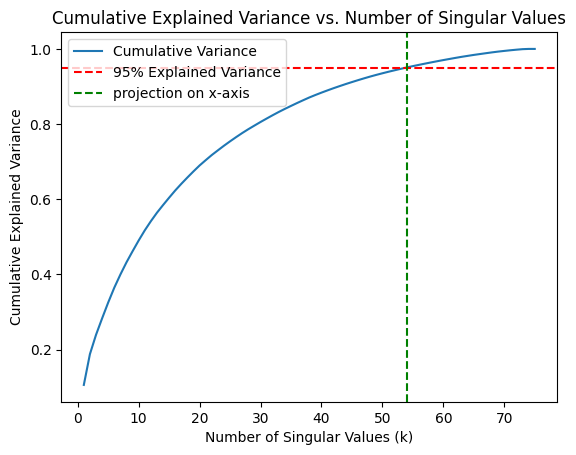

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(filled_user_item_matrix)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, label='Cumulative Variance')

index_95 = np.argmax(cumulative_variance >= 0.95)

plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')

plt.axvline(x=index_95 + 1, color='g', linestyle='--', label='projection on x-axis')

plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Singular Values')
plt.legend()
plt.show()
